In [1]:
import itertools
import numpy as np
import scipy
from PIL import Image
import matplotlib.pyplot as plt

In [2]:
def load_image(file_path: str) -> np.ndarray:
    pil_image = Image.open(file_path)
    pil_image.thumbnail((150, 150))
    return np.array(pil_image)

In [3]:
def to_grayscale(img: np.ndarray) -> np.ndarray:
    return np.array(Image.fromarray(img).convert('L'), dtype=float)

In [5]:
path = 'images/karo.png'

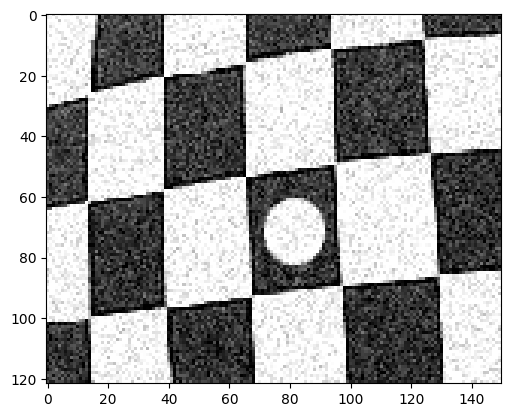

In [6]:
# Load Image into memory
image = load_image(path)

# Convert to Grayscale if it not already is
if image.ndim > 2:
    image = to_grayscale(image)
    
# Convert Grayscale values to Float
image = image.astype(float)

plt.imshow(image, cmap='gray')
plt.show()

In [7]:
gradientX = np.array([[-1, 0, 1],
                      [-2, 0, 2],
                      [-1, 0, 1]])
gradientY = np.array([[-1, -2, -1],
                      [0,  0,  0],
                      [1,  2,  1]])

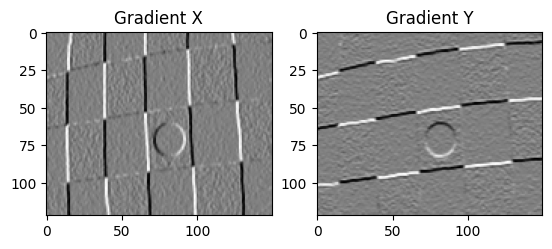

In [8]:
Ix = scipy.ndimage.correlate(image, gradientX)
Iy = scipy.ndimage.correlate(image, gradientY)

fig, (ax1, ax2) = plt.subplots(1, 2)

ax1.imshow(-Ix, cmap='gray')
ax1.set_title('Gradient X')

ax2.imshow(-Iy, cmap='gray')
ax2.set_title('Gradient Y')

plt.show()

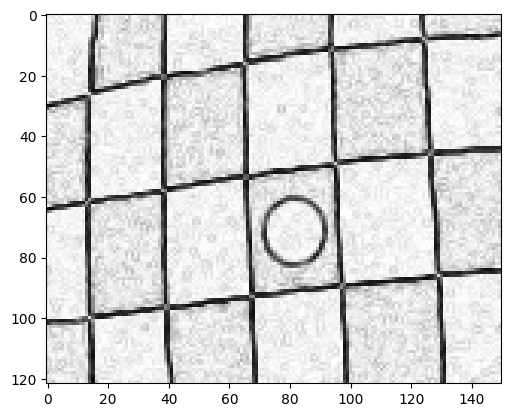

In [9]:
I = np.sqrt(Ix**2 + Iy**2)

plt.imshow(-I, cmap='gray')
plt.show()

In [17]:
n = np.ones((7, 7))

Axx = scipy.ndimage.correlate(Ix**2, n)
Axy = scipy.ndimage.correlate(Ix*Iy, n)
Ayy = scipy.ndimage.correlate(Iy**2, n)

b = -Axx - Ayy
c = Axx*Ayy-Axy**2
D = b**2-4*c

eigenvalue_l1 = (-b + np.sqrt(D))/2
eigenvalue_l2 = (-b-np.sqrt(D))/2

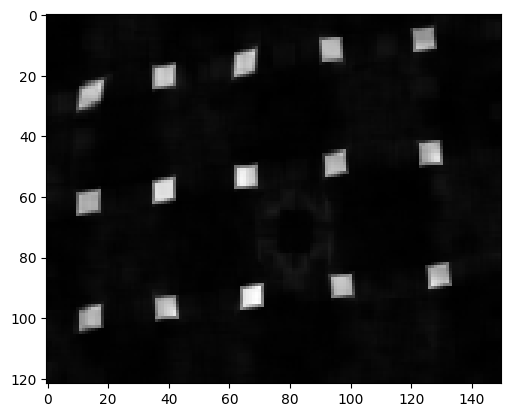

In [18]:
plt.imshow(eigenvalue_l2, cmap='gray')
plt.show()

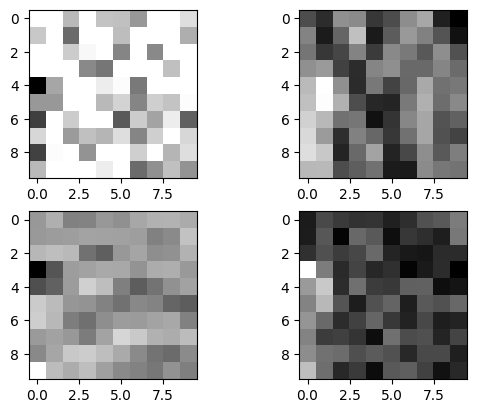

In [19]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)

ax1.imshow(image[80:90, 0:10], cmap='gray')
ax2.imshow(Ix[80:90, 0:10], cmap='gray')
ax3.imshow(Iy[80:90, 0:10], cmap='gray')
ax4.imshow(I[80:90, 0:10], cmap='gray')

plt.show()

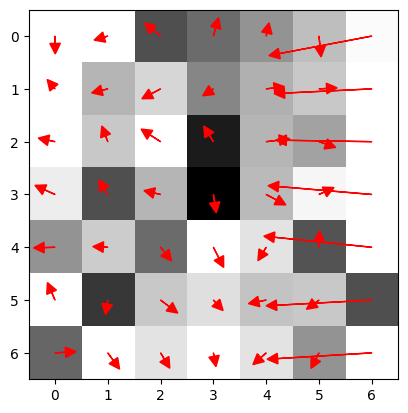

In [20]:
y_pos = 95
x_pos = 94
window_size = 7

start_y = max(0, y_pos - (window_size - 1) // 2)
end_y = min(image.shape[0], y_pos + (window_size - 1) // 2 + 1)
start_x = max(0, x_pos - (window_size - 1) // 2)
end_x = min(image.shape[1], x_pos + (window_size - 1) // 2 + 1)

image[start_y:end_y, start_x:end_x]

plt.imshow(image[start_y:end_y, start_x:end_x], cmap='gray')
for y, x in itertools.product(range(start_y, end_y), range(start_x, end_x)):
    start_point = (y - start_y, x - start_x)
    
    Ix_value = Ix[y, x]
    Iy_value = Iy[y, x]

    vector = (Iy_value, Ix_value)
    
    # Calculate the end point of the arrow
    end_point = (start_point[0] + 1/500 * vector[0], start_point[1] + 1/500 * vector[1])
    # Draw the arrow
    plt.arrow(start_point[1], start_point[0], end_point[1] - start_point[1], end_point[0] - start_point[0], color='red', head_width=0.2, head_length=0.2)
        
plt.show()

In [21]:
# Calculate the eigenvectors using the eigenvalues l1 and l2
eigenvector_l1 = np.array([Axy[y_pos, x_pos], eigenvalue_l1[y_pos, x_pos] - Axx[y_pos, x_pos]])
eigenvector_l2 = np.array([Axy[y_pos, x_pos], eigenvalue_l2[y_pos, x_pos] - Axx[y_pos, x_pos]])

# Normalize eigenvectors
eigenvector_l1 /= np.linalg.norm(eigenvector_l1)
eigenvector_l2 /= np.linalg.norm(eigenvector_l2)

print(eigenvector_l1, eigenvector_l2)
print(eigenvalue_l1[y_pos, x_pos], eigenvalue_l2[y_pos, x_pos])

[-0.99990578  0.01372685] [-0.01372685 -0.99990578]
5486225.861309467 148010.13869053265


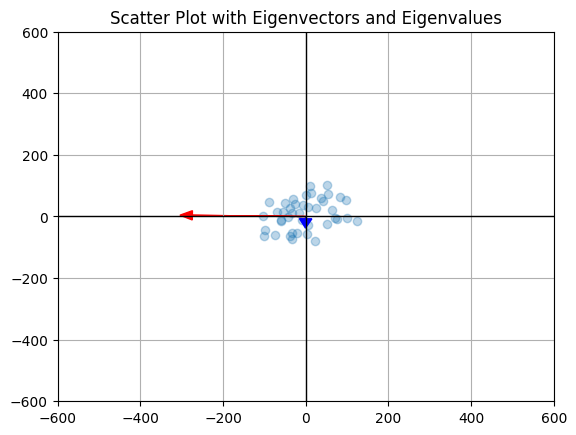

In [22]:
scatter_x, scatter_y = [], []
for y, x in itertools.product(range(start_y, end_y), range(start_x, end_x)):
    scatter_x.append(Ix[y, x])
    scatter_y.append(Iy[y, x])

# Create scatter plot
plt.scatter(scatter_x, scatter_y, alpha=0.3)

# Set limits to always go from -600 to 600
plt.xlim(-600, 600)
plt.ylim(-600, 600)

# Draw axes through the origin
plt.axhline(0, color='black', linewidth=1)
plt.axvline(0, color='black', linewidth=1)

# Plot eigenvectors
plt.arrow(0, 0, eigenvector_l1[0] * eigenvalue_l1[y_pos, x_pos] * 0.00005, eigenvector_l1[1] * eigenvalue_l1[y_pos, x_pos] * 0.00005, 
          head_width=30, head_length=30, color='r', label='Eigenvector for l1')
plt.arrow(0, 0, eigenvector_l2[0] * eigenvalue_l2[y_pos, x_pos] * 0.00005, eigenvector_l2[1] * eigenvalue_l2[y_pos, x_pos] * 0.00005, 
          head_width=30, head_length=30, color='b', label='Eigenvector for l2')

plt.title('Scatter Plot with Eigenvectors and Eigenvalues')
plt.grid(True)
plt.show()